In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [7]:
#Loading titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
features=["pclass", "sex", "fare", "age", "embarked"]
target=["survived"]

In [11]:
#Missing values

from sklearn.impute import SimpleImputer

medi_impu= SimpleImputer(strategy="median")
df[["age"]]=medi_impu.fit_transform(df[["age"]])

mostf_impu = SimpleImputer(strategy="most_frequent")
df[["embarked"]] = mostf_impu.fit_transform(df[["embarked"]])

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
#Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["sex"]=le.fit_transform(df["sex"])

df["embarked"] = le.fit_transform(df["embarked"])

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,28,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,51,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,34,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,47,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,47,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [18]:
X= df[features]
y= df[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42
)

In [24]:
#Decison Tree classifier
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
#Evaluation 
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  0.776536312849162


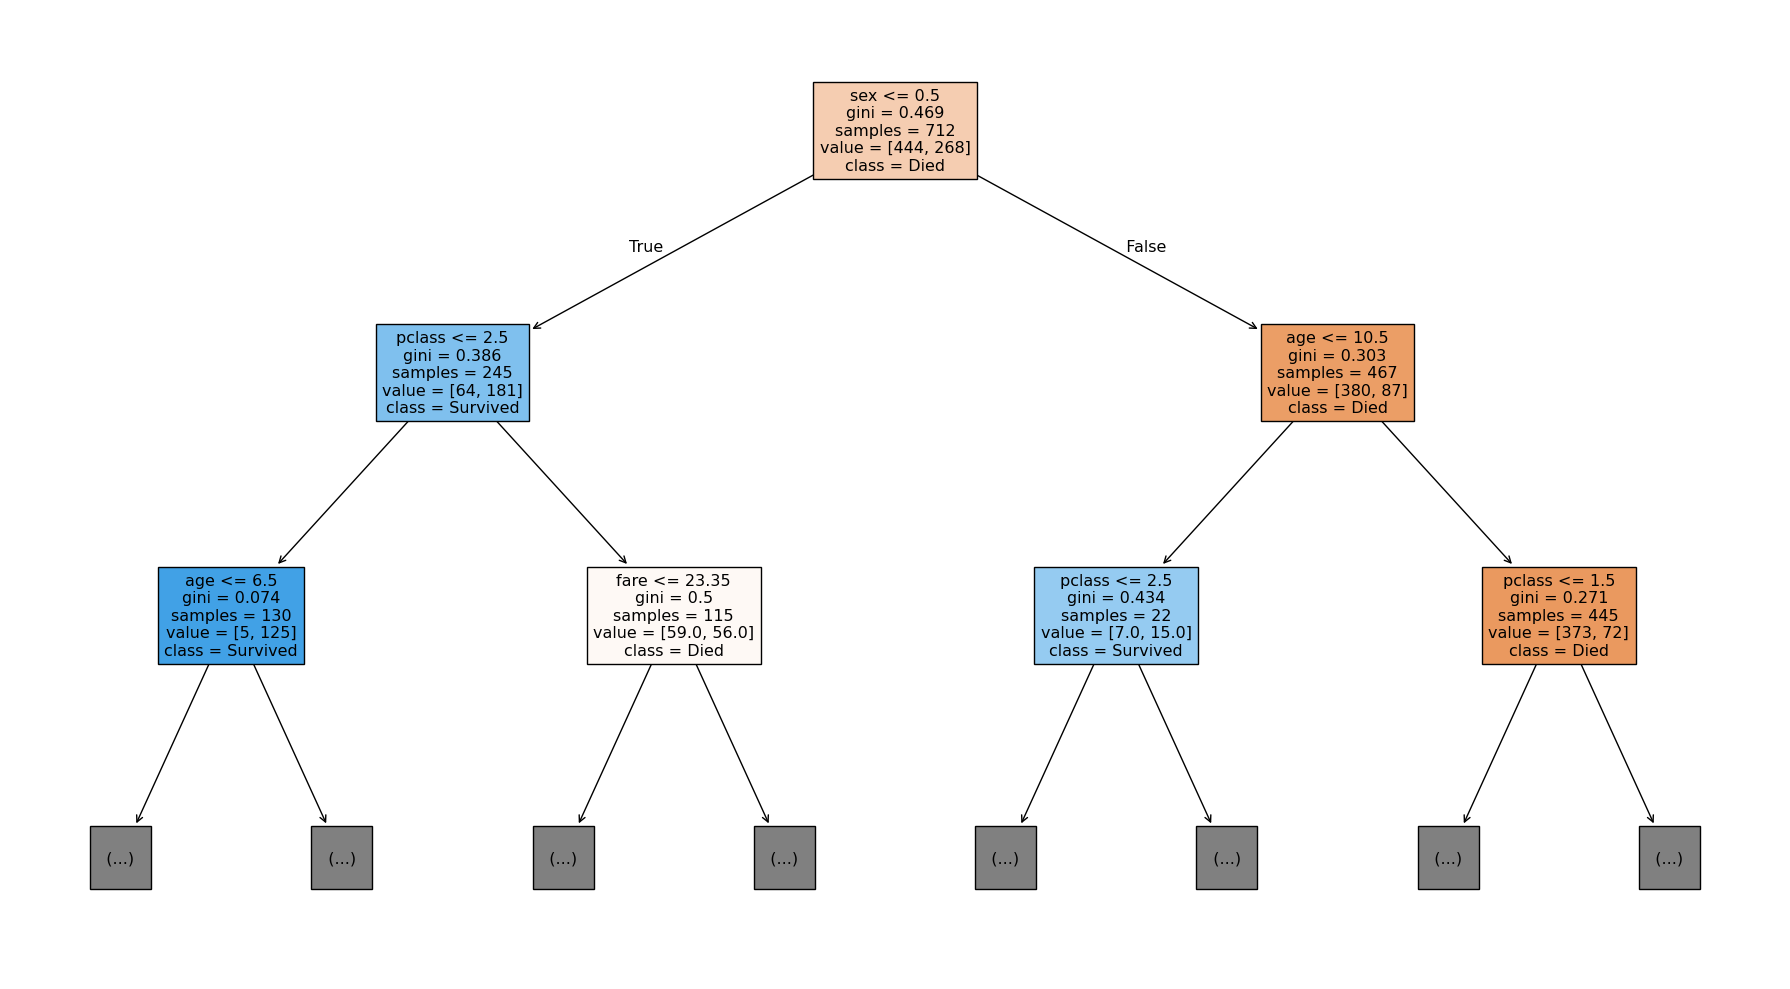

In [27]:
# Plot tree
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names = X.columns,
    class_names=["Died","Survived"],
    filled = True,
    max_depth=2
)

plt.tight_layout()
plt.show()

# Decision Tree with pre- pruning

for depth = 2 accuracy = 0.7653631284916201
for depth = 3 accuracy = 0.7988826815642458
for depth = 4 accuracy = 0.7988826815642458


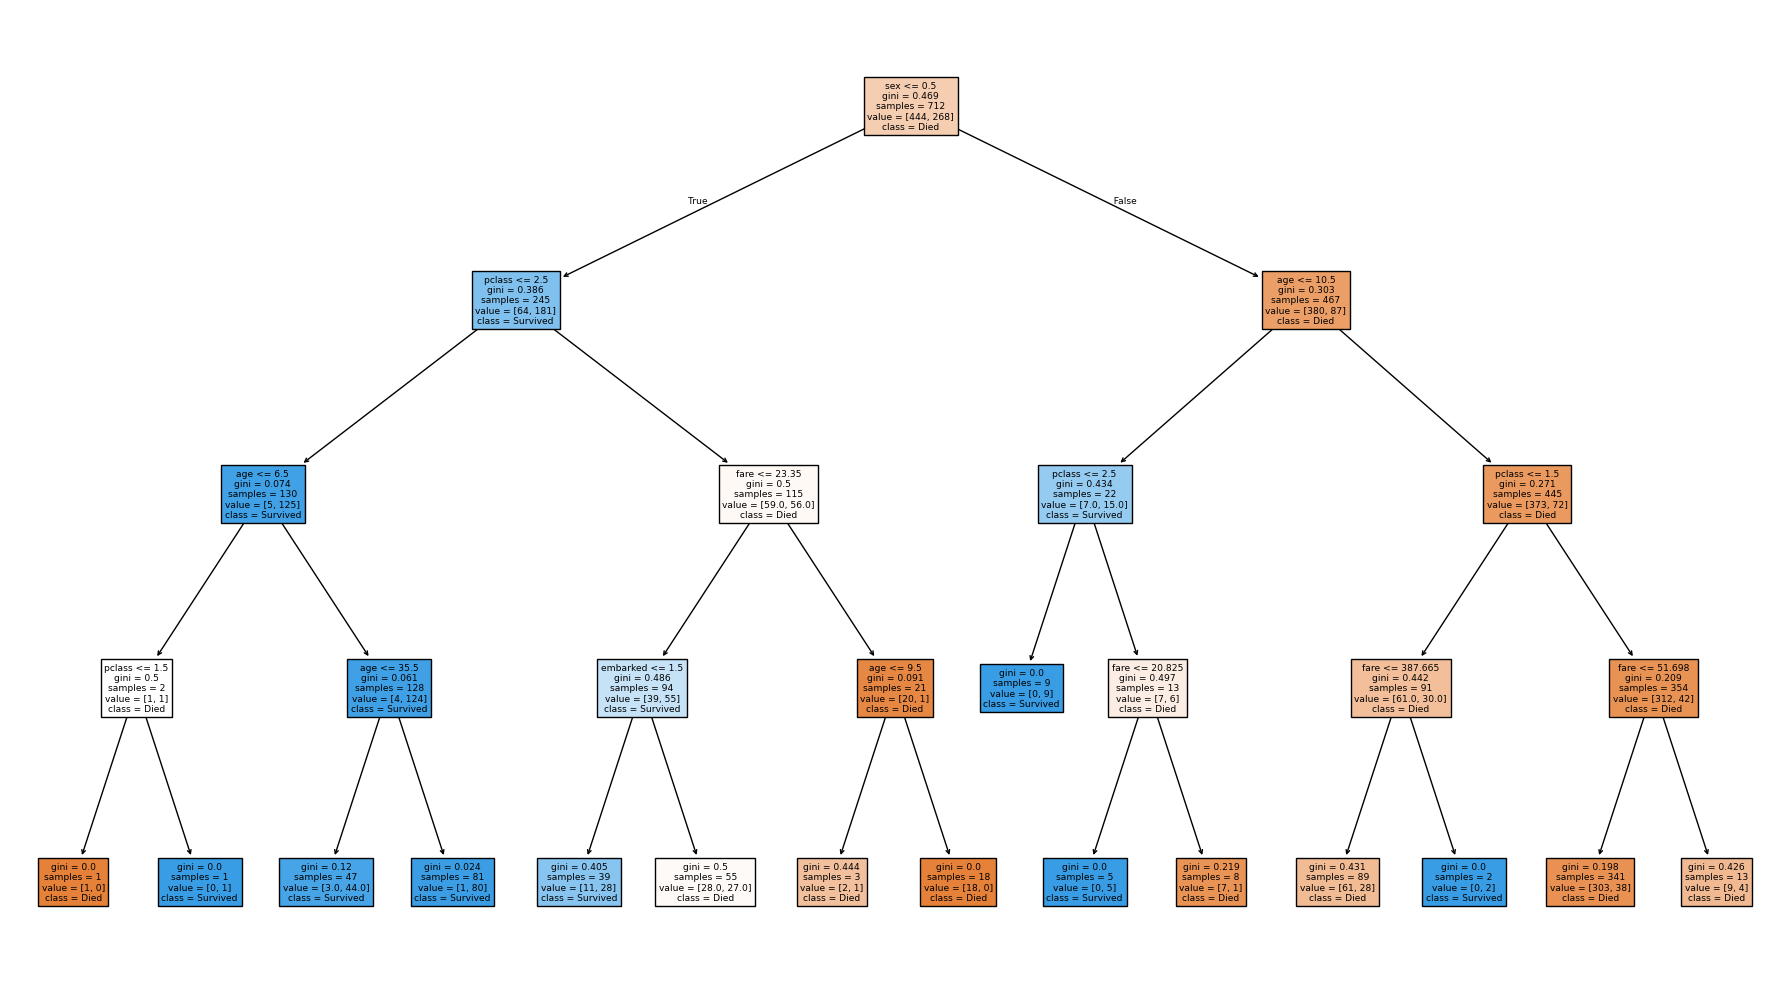

for depth = 5 accuracy = 0.7988826815642458
for depth = 6 accuracy = 0.7988826815642458
for depth = 7 accuracy = 0.8100558659217877
for depth = 8 accuracy = 0.7988826815642458
for depth = 9 accuracy = 0.7988826815642458
for depth = 10 accuracy = 0.8044692737430168
for depth = 11 accuracy = 0.8100558659217877
for depth = 12 accuracy = 0.8044692737430168
for depth = 13 accuracy = 0.7932960893854749
for depth = 14 accuracy = 0.7821229050279329


In [99]:
max_depths=[2,3,4,5,6,7,8,9,10,11,12,13,14]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth= depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for depth = {depth} accuracy = {acc}")
    if depth ==4:
        plt.figure(figsize=(18,10))
        plot_tree(
            model,
            feature_names = X.columns,
            class_names=["Died","Survived"],
            filled = True
        )
        
        plt.tight_layout()
        plt.show()


for split = 5 accuracy = 0.7988826815642458
for split = 10 accuracy = 0.7988826815642458


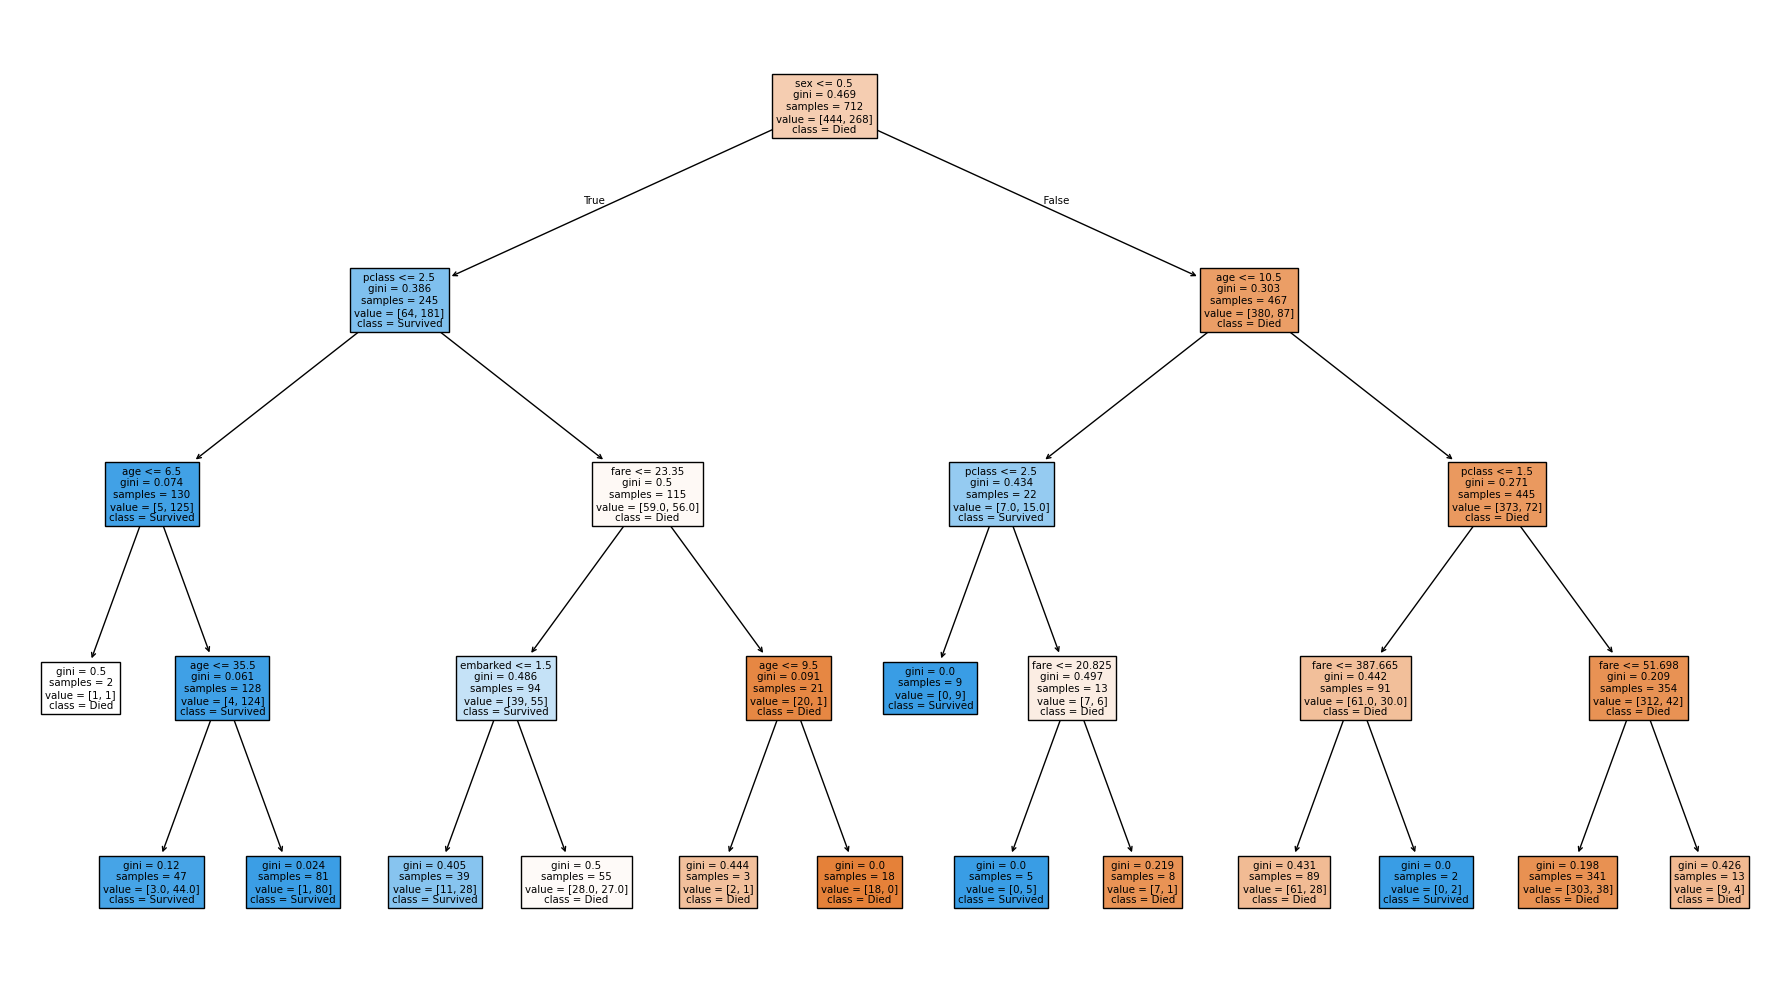

for split = 15 accuracy = 0.7988826815642458
for split = 20 accuracy = 0.7988826815642458
for split = 25 accuracy = 0.7932960893854749
for split = 30 accuracy = 0.7932960893854749


In [45]:
min_samples_split=[5,10,15,20,25,30]

for split in min_samples_split:
    model = DecisionTreeClassifier(max_depth= 4, min_samples_split=split)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for split = {split} accuracy = {acc}")
    if split ==10:
        plt.figure(figsize=(18,10))
        plot_tree(
            model,
            feature_names = X.columns,
            class_names=["Died","Survived"]
            filled = True,
            max_depth=4
        )
        
        plt.tight_layout()
        plt.show()

# Decsion tree with post pruning

In [47]:
#CCP value in the post pruning 
full_tree= DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [69]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.45921494e-04
 1.84428555e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 3.51123596e-04 4.68164794e-04 4.68164794e-04 5.61797753e-04
 6.24219725e-04 6.67991230e-04 7.02247191e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.32292967e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.94231048e-04 8.99610781e-04
 9.24769963e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.00253471e-03 1.05337079e-03 1.07400895e-03
 1.08038029e-03 1.11865144e-03 1.12359551e-03 1.12359551e-03
 1.13139825e-03 1.17041199e-03 1.18841832e-03 1.22566125e-03
 1.22893258e-03 1.22893258e-03 1.24361593e-03 1.24843945e-03
 1.27565833e-03 1.30996111e-03 1.33761370e-03 1.37044603e-03
 1.46301498e-03 1.47927070e-03 1.51142557e-03 1.54072312e-03
 1.56675436e-03 1.60434338e-03 1.66892062e-03 1.76144762e-03
 1.86751451e-03 2.10674157e-03 2.34082397e-03 2.41226470e-03
 2.64273538e-03 2.69412911e-03 3.43770913e-03 3.56327570e-03
 5.47433606e-03 9.055400

In [65]:
#train our model for all alphas

trees =[]

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [66]:
best_alpha =0
best_acc=0

for model, alpha in trees:
    curr_acc= model.score(X_test, y_test)
    if curr_acc> best_acc:
        best_acc=curr_acc
        best_alpha= alpha

In [70]:
best_acc

0.8379888268156425

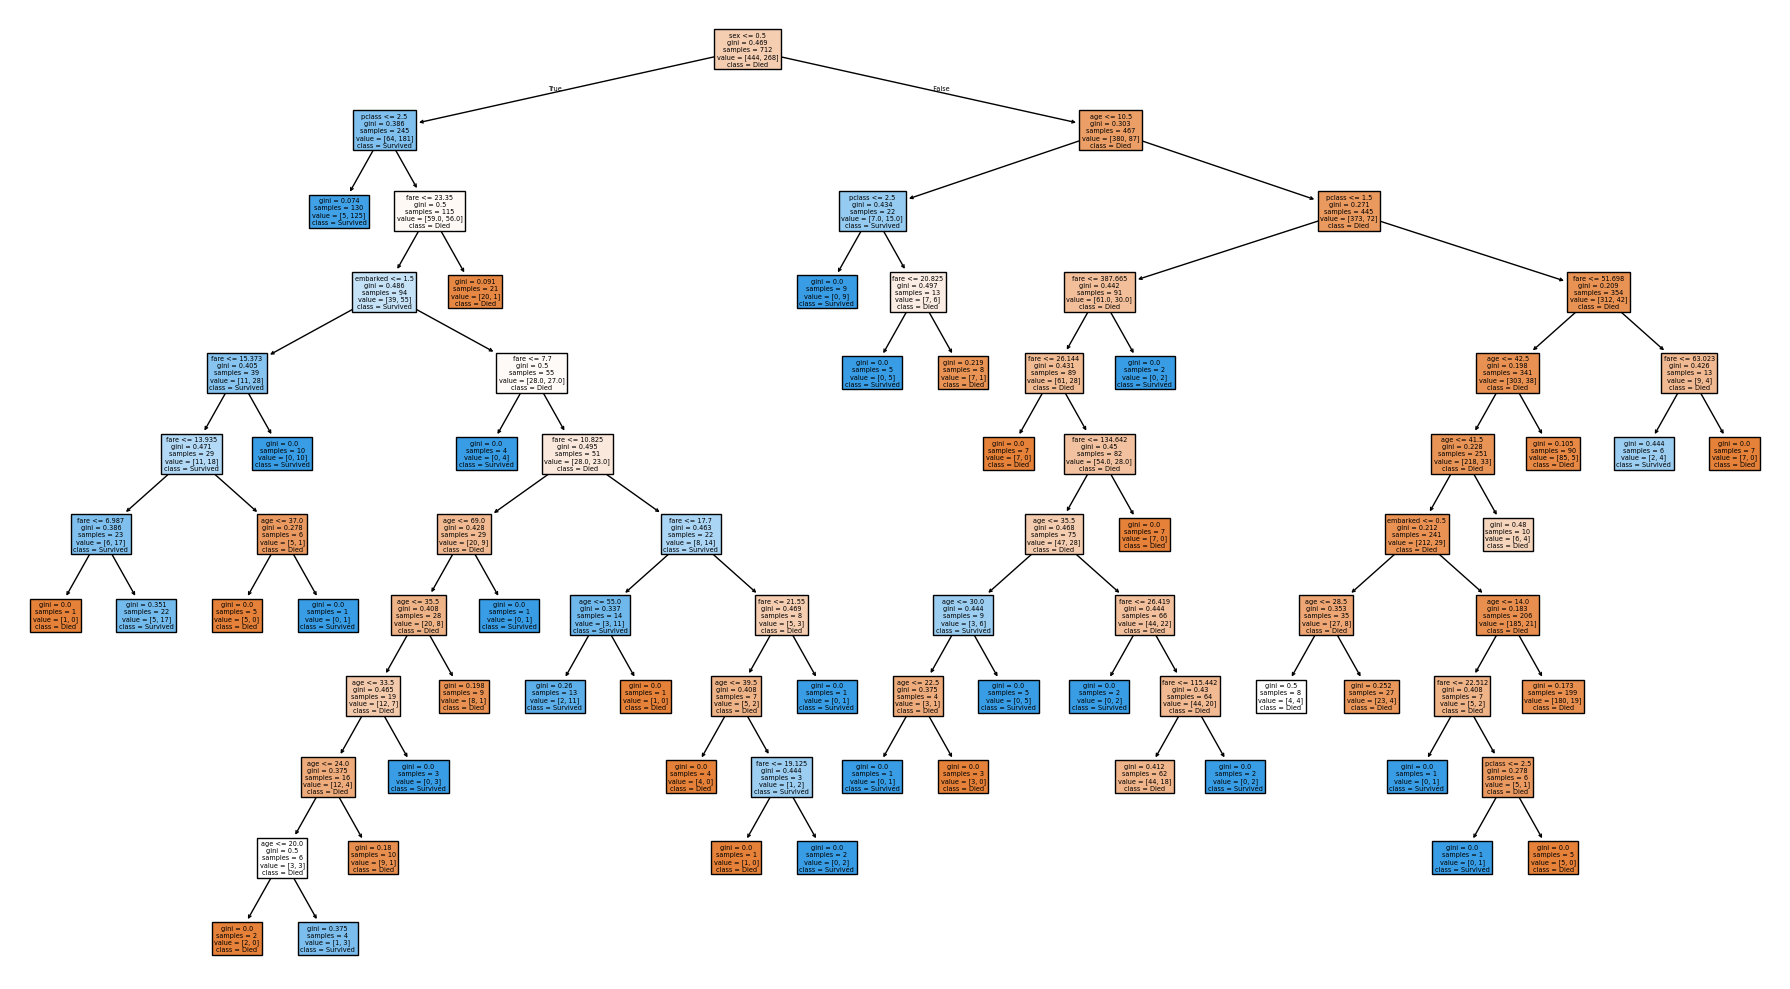

In [102]:
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=11)
best_model.fit(X_train, y_train)
plt.figure(figsize=(18,10))
plot_tree(
    best_model,
    feature_names = X.columns,
    class_names=["Died","Survived"],
    filled = True
)

plt.tight_layout()
plt.show()

In [103]:
print(best_model.score(X_test, y_test))

0.8379888268156425
